# This data is about Fifa 19 players
**this dataset is not included in as one of the provided by udacity i simply saw that it's a good data set and will get good visuals from it**
## invastegation overview:
* The data needed to be cleaned espcially the Value and Wage parts to extract the values correctly
* International reputation palyes a huge role in the data
* Value and Wage columns most of the time have +ve relation with other columns


In [1]:
#importing libs
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Loading the data

In [2]:
df = pd.read_csv('clean_df.csv')
df.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,L. Messi,31,Argentina,94,94,FC Barcelona,110.5,565.0,Left,5.0,...,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77.0,405.0,Right,5.0,...,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118.5,290.0,Right,5.0,...,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0
3,De Gea,27,Spain,91,93,Manchester United,72.0,260.0,Right,4.0,...,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102.0,355.0,Right,4.0,...,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0


## Getting the columns that matter the most
**There is a huge amount of columns in this data set so i imported only the columns that matter to the analysis**

In [3]:
df_sal = df[['Name', 'Age', 'Overall', 'Potential','Club', 'Value', 'Wage',
                   'Preferred Foot', 'Position','Stamina','ShotPower','International Reputation']].copy()
df_sal.head()

,Name,Age,Overall,Potential,Club,Value,Wage,Preferred Foot,Position,Stamina,ShotPower,International Reputation
0,L. Messi,31,94,94,FC Barcelona,110.5,565.0,Left,RF,72.0,85.0,5.0
1,Cristiano Ronaldo,33,94,94,Juventus,77.0,405.0,Right,ST,88.0,95.0,5.0
2,Neymar Jr,26,92,93,Paris Saint-Germain,118.5,290.0,Right,LW,81.0,80.0,5.0
3,De Gea,27,91,93,Manchester United,72.0,260.0,Right,GK,43.0,31.0,4.0
4,K. De Bruyne,27,91,92,Manchester City,102.0,355.0,Right,RCM,90.0,91.0,4.0


In [4]:
#dropping na values
df_sal.dropna(inplace=True)

## Which Club is willing to pay above average Wage
**why i specifically wanted to know the top clubs in paying wage?**

to see if paying more is winning more and it really looks like that having better players that ask for more money results in winning more

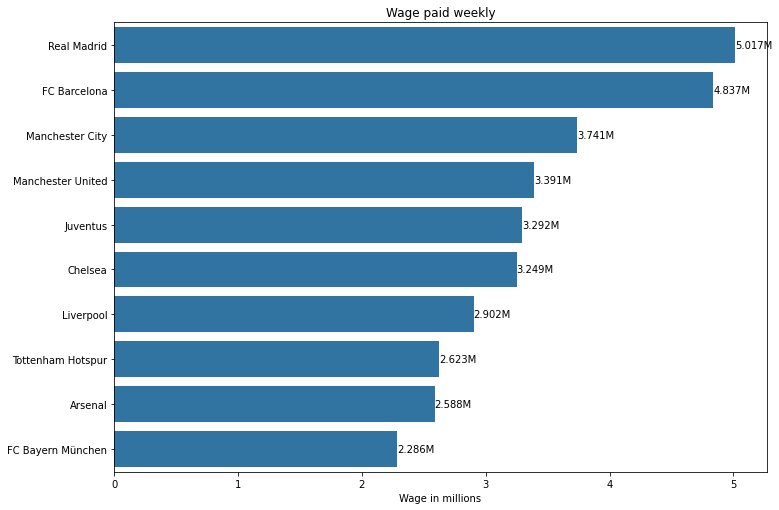

In [5]:
#in this cell i grouped the the data by Clubs and arranged them by total wage paied to get a top 10 list
#top clubs that pay wage
wage = df_sal.groupby(['Club'],as_index=False)['Wage'].sum()
top10_w = wage.sort_values(ascending = False,by='Wage')[:10]
top10_w['Wage'] = top10_w['Wage']/10**3
#visualizing the outcome
clubs = list(top10_w.Club)
plt.figure(figsize=[ 11.69, 8.27])
base_color = sns.color_palette()[0]
plt.title('Wage paid weekly')
sns.barplot(x=top10_w['Wage'],y= clubs,data = top10_w,color = base_color)
plt.xlabel('Wage in millions');
for i in range(10):
    weekly_wage = list(top10_w[top10_w.Club.str.startswith(clubs[i])]['Wage'])[0]
    pct_string = f'{str(weekly_wage)}M'
    plt.text(weekly_wage, i, pct_string, va='center')

## Clubs that have the most valuable players
**What this plot proves?**

this plot proves that paying more is winning more most of the last top 10 list is here in this plot and there is something in common in between all these clubs that they all are popualr and have a decent chang in winnig big titles

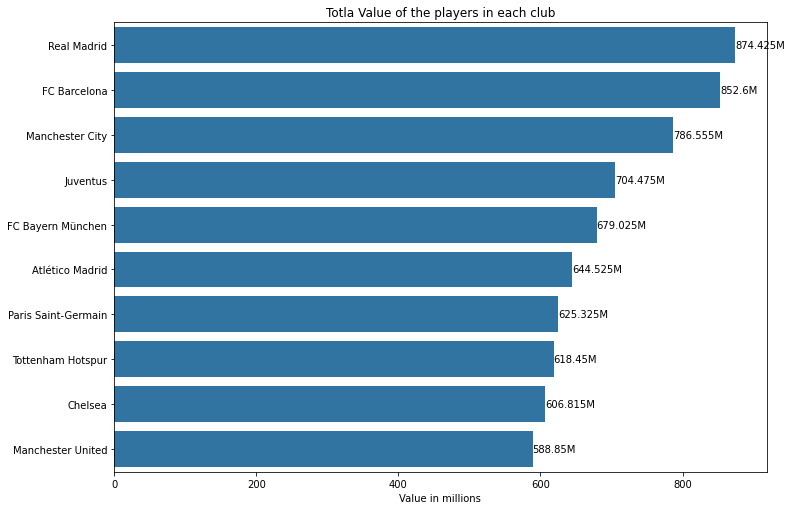

In [6]:
#total value of players in clubs
value = df_sal.groupby(['Club'],as_index=False)['Value'].sum()
top10_v = value.sort_values(ascending = False,by='Value')[:10]
top10_v['Value'] = top10_v['Value'].round(3)
#visualizing the outcome
plt.figure(figsize=[ 11.69, 8.27])
clubs_v = list(top10_v.Club)
base_color = sns.color_palette()[0]
plt.title('Totla Value of the players in each club')
sns.barplot(x=top10_v.Value, y=clubs_v, data=top10_v, color=base_color)
plt.xlabel('Value in millions');
for i in range(10):
    total_value = list(top10_v[top10_v.Club.str.startswith(clubs_v[i])]['Value'])[0]
    pct_string = f'{str(total_value)}M'
    plt.text(total_value, i, pct_string, va='center')

## Top 10 paid players 
**who are the top paid players and why are they top paid?**

as we see the top paid players are all famous and have great experience in the game but this is not the only reason what they have in common is that all of them are in there 30's which is the sweet spot of being healthy at your peak and also have a lot of experience in what you do 

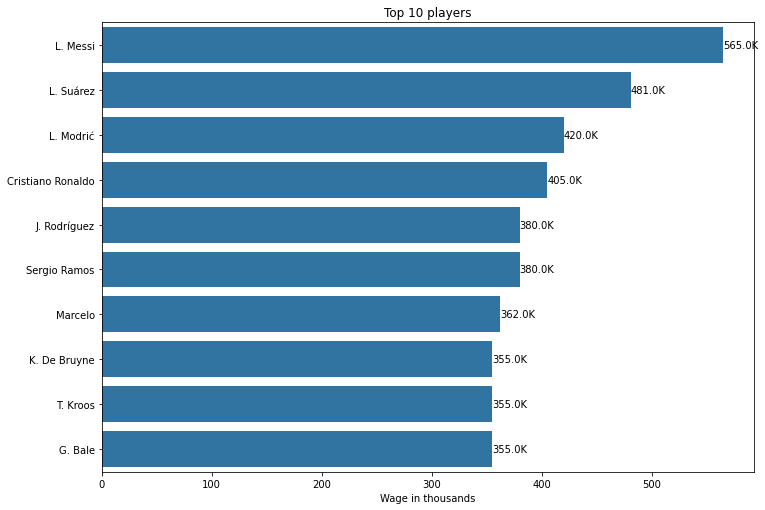

In [7]:
player = df_sal.groupby(['Name'],as_index=False)['Wage'].sum()
top10_p = player.sort_values(ascending = False,by='Wage')[:10]
top10_p['Wage'] = top10_p['Wage'].round(3)
plt.figure(figsize=[ 11.69, 8.27])
#visualizing the outcome
players = list(top10_p.Name)
plt.title('Top 10 players')
sns.barplot(x=top10_p.Wage, y=players, data=top10_p, color=base_color)
plt.xlabel('Wage in thousands');
for i in range(10):
    total_value = list(top10_p[top10_p.Name.str.startswith(players[i])]['Wage'])[0]
    pct_string = f'{str(total_value)}K'
    plt.text(total_value, i, pct_string, va='center')

## Relation between age and International Reputation
**As we see in the visualization ahead that compares age and reputation of the players and reputation is from 1 to 5 and 5 is the highest majorty of players as we see have one and only few got 5, I also noticed that as the reputation score increses the box plot is not as spread which and it shrinks on both sides wich means that players need to be not only have crazy status but also have experience and looks like ages between 25 to 35 is where players have 4 and 5 rep points because usally this is the prime years of a player**

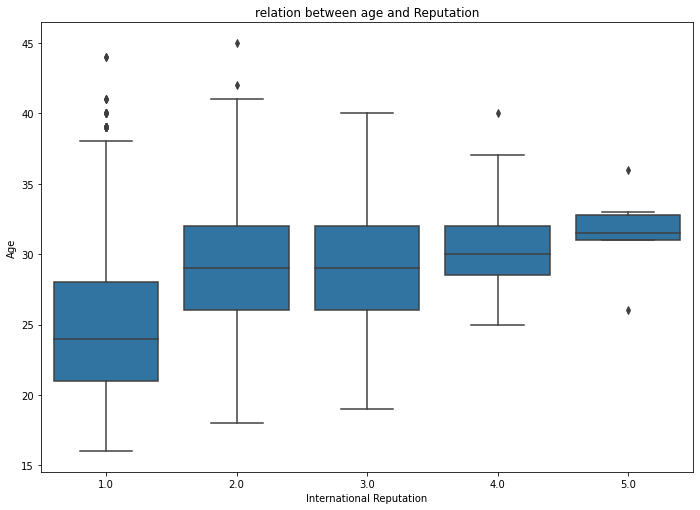

In [8]:
#box plot to show th relation between age and rep
plt.figure(figsize=[ 11.69, 8.27])
sns.boxplot(data=df_sal,y='Age',x='International Reputation',color=base_color)
plt.ylabel('Age')
plt.xlabel('International Reputation')
plt.title('relation between age and Reputation');

## Relation between Overall and Wage
**As we see in here that the Wage of a player increases as his Overall points increase around 80+ points all players gain decent pay because they are good players and from 85 to 90+ all players get over 100K with few outliers at the 400K+ mark**

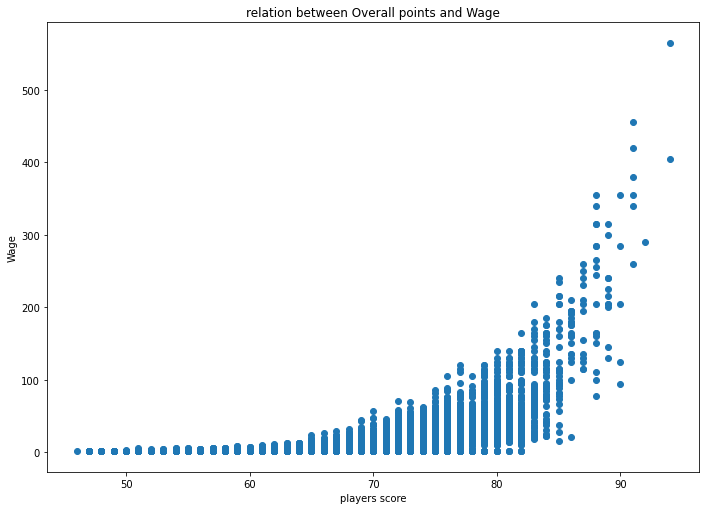

In [9]:
plt.figure(figsize=[ 11.69, 8.27])
plt.scatter(data=df_sal,x='Overall',y='Wage')
plt.xlabel('players score')
plt.ylabel('Wage')
plt.title('relation between Overall points and Wage');

## Relation between Potential and International Reputation
**In this visualization we see that as the potential of players increase rep shrinks high rep like 4 and 5 is only for palyers in range 80's to 90's and there are not outliers but in the ranks 1 and 2  there is ton of outliers from that visual it seems that rep depends on many things potential is one of them but it's not a main reason because there is a lot of rank 2 players in the range of rank 4 and 5**

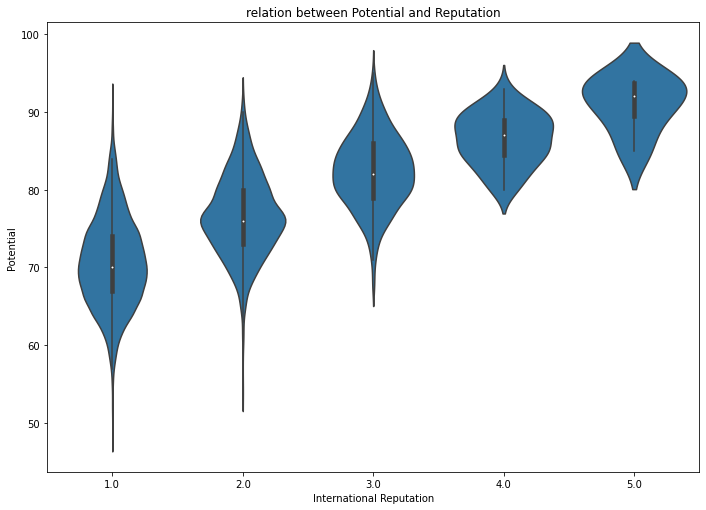

In [10]:
plt.figure(figsize=[ 11.69, 8.27])
sns.violinplot(data=df_sal,y='Potential',x='International Reputation',color=base_color)
plt.ylabel('Potential')
plt.xlabel('International Reputation')
plt.title('relation between Potential and Reputation');

## Relation between Overall, Wage and International Reputation
**This plot shows us that players with high overall not only gain more Wage as a player it also gives the player high international reputation of course its not the only factor for high Rep but it's one of the reasons**

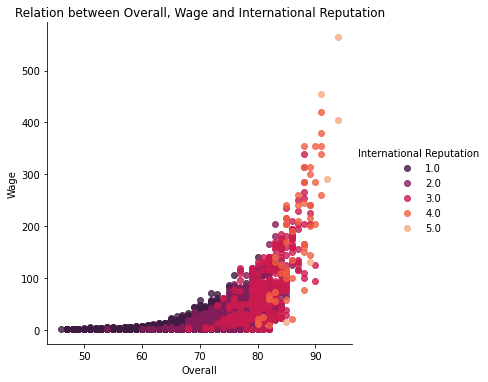

In [11]:
sns.lmplot(x='Overall',y='Wage', hue='International Reputation', 
           data=df_sal.loc[df_sal['Preferred Foot'].isin(['Left', 'Right'])], 
           fit_reg=False,palette='rocket');
plt.title("Relation between Overall, Wage and International Reputation");